In [1]:
versioninfo()

Julia Version 1.9.0
Commit 8e630552924 (2023-05-07 11:25 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin22.4.0)
  CPU: 12 × Intel(R) Core(TM) i9-8950HK CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 12 virtual cores


In [2]:
# The precompile option takes a lot of time!
using Pkg
Pkg.add("DelimitedFiles"); #precompile;
Pkg.add("Makie");          #precompile;
Pkg.add("GLMakie");        #precompile;
Pkg.add("FileIO");         #precompile;

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
Precompiling project...
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ Plots → IJuliaExt
  ✓ Plots → UnitfulExt
  ✓ Plots → GeometryBasicsExt
  ✓ Makie
  6 dependencies successfully precompiled in 133 seconds. 289 already precompiled.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
   Installed ModernGL ─────────── v1.1.7
   Installed ShaderAbstractions ─ v0.3.0
   Installed GLFW ─────────────── v3.4.1
   Installed GLMakie ──────────── v0.8.5
   Installed MeshIO ───────────── v0.4.10
    Updating `~/.julia/environments/v1.9/Project.toml`
  [e9467ef8] + GLMakie v0.8.5
    Updating `~/.julia/environments/v1.9/Manifest.toml`
  [f7f18e0c] + GLFW v3.4.1
  [e9467ef8] + GLMakie v0.8.5
  [7269a6da] + MeshIO v0.4.10
  [66fc60

In [3]:
using DelimitedFiles, Makie, GLMakie, FileIO

In [4]:
download("https://raw.githubusercontent.com/florentPoux/3D-small-datasets/main/tree_sample.csv","point_cloud_sample.csv")
pointlist=readdlm("point_cloud_sample.csv",';')

100000×6 Matrix{Float64}:
 41.6179  46.8634  18.311   0.357621  -0.003791  0.933859
 38.3256  48.8711  15.896  -0.709508  -0.073998  0.700802
 37.5081  49.965   18.053  -0.69199   -0.426478  0.582466
 37.1348  53.5679  17.27    0.104579  -0.212938  0.971453
 39.4802  54.7671   2.407   0.155142  -0.276558  0.948392
 31.3828  46.837    2.279  -0.256003   0.16218   0.952974
 37.8124  49.3977   8.908   0.908389   0.285243  0.305722
 36.4778  50.1293  11.803  -0.952869  -0.296249  0.065406
 37.0304  50.525   13.739  -0.220558   0.794319  0.566049
 40.6806  50.8001  17.594   0.529808   0.7125    0.460052
 40.0447  48.1255  19.608   0.693374   0.196122  0.693374
 45.8221  48.0697   9.036   0.862261  -0.466127  0.198067
 35.6333  50.9696  14.439   0.453147  -0.673869  0.583574
  ⋮                                              ⋮
 38.1632  52.3041  17.22    0.600814   0.085417  0.794812
 35.5702  48.5057  13.851   0.928444   0.098656  0.358133
 39.4959  51.0858  19.934   0.676993  -0.420833  0.60

In [22]:
pointlist[1]

41.61793137

In [5]:
points=pointlist[:,1:3]
normals=pointlist[:,4:6]
typeof(points)

Matrix{Float64} (alias for Array{Float64, 2})

In [6]:
points_sampled=points[1:10:end,:]
zcoloring_scale=points_sampled[:,3]/maximum(points_sampled[:,3])

10000-element Vector{Float64}:
 0.8448761377170725
 0.9047201353017651
 0.10441563117697988
 0.1052000154215842
 0.31232408728878375
 0.5038065564852937
 0.7303095935816333
 0.5903658874763806
 0.9171319382722807
 0.10926036971584341
 0.12005721216170108
 0.1210261555322801
 0.7624232875363854
 ⋮
 0.1105061570815257
 0.8498592876412052
 0.6108983325932988
 0.7849859374846482
 0.11096756020260368
 0.10257001869266799
 0.6322151730285074
 0.11668896785520005
 0.09744843615870123
 0.20061827996999881
 0.7835555799193052
 0.9197619022415425

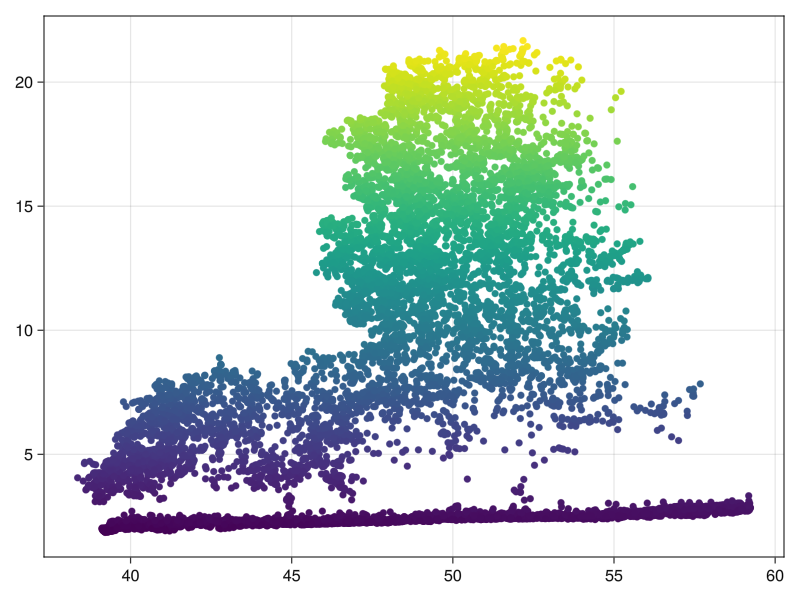

In [8]:
scatter(points_sampled[:,2:3], color=zcoloring_scale, markersize=10)

(https://docs.juliahub.com/MakieGallery/Ql23q/0.2.17/functions-overview.html#AbstractPlotting.meshscatter)

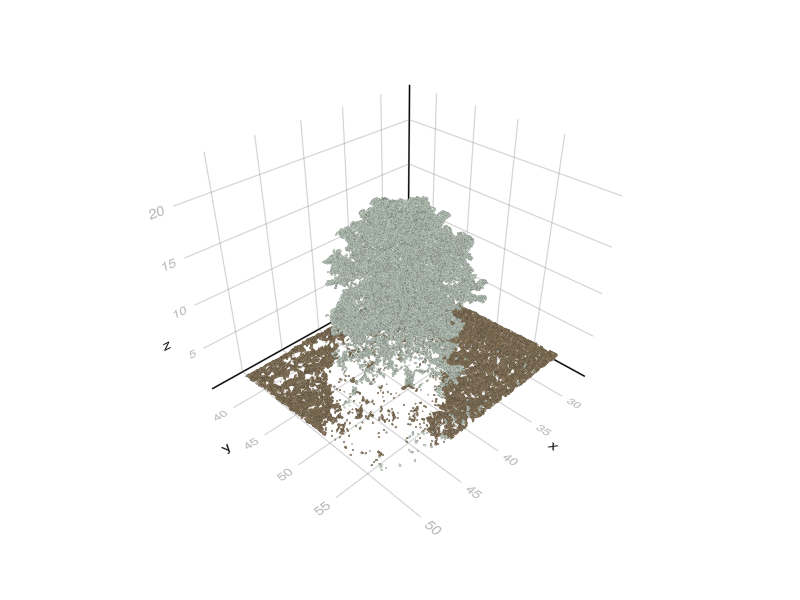

In [49]:
indexes_ground=findall(x->x<3, points[:,3])
indexes_tree=findall(x->x>=3, points[:,3])
meshscatter(points[indexes_ground,:], color="navajowhite4", markersize=0.1 )
meshscatter!(points[indexes_tree,:], color="honeydew3", markersize=0.1 )
current_figure()  

In [ ]:
Makie.save("meshscatter_classified.png", current_figure())

In [23]:
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Applications/Julia-1.9.app/Contents/Resources/julia/share/julia/stdlib/v1.9/Pkg/src/Pkg.jl:726


Dict{String, VersionNumber} with 11 entries:
  "CUDA"              => v"4.3.2"
  "BenchmarkTools"    => v"1.3.2"
  "DelimitedFiles"    => v"1.9.1"
  "PyCall"            => v"1.95.1"
  "LoopVectorization" => v"0.12.159"
  "IJulia"            => v"1.24.0"
  "Makie"             => v"0.19.5"
  "Plots"             => v"1.38.15"
  "FileIO"            => v"1.16.1"
  "Glob"              => v"1.3.1"
  "GLMakie"           => v"0.8.5"

In [37]:
function installed_dependencies(deps::Dict{Base.UUID, Pkg.API.PackageInfo})
    #deps = Pkg.dependencies()
    installs = Dict{String, VersionNumber}()
    for (uuid, dep) in deps
        dep.is_direct_dep || continue
        dep.version === nothing && continue
        installs[dep.name] = dep.version
    end
    return installs
end

installed_dependencies (generic function with 1 method)

In [38]:
installed_dependencies(Pkg.dependencies())

Dict{String, VersionNumber} with 11 entries:
  "CUDA"              => v"4.3.2"
  "BenchmarkTools"    => v"1.3.2"
  "DelimitedFiles"    => v"1.9.1"
  "PyCall"            => v"1.95.1"
  "LoopVectorization" => v"0.12.159"
  "IJulia"            => v"1.24.0"
  "Makie"             => v"0.19.5"
  "Plots"             => v"1.38.15"
  "FileIO"            => v"1.16.1"
  "Glob"              => v"1.3.1"
  "GLMakie"           => v"0.8.5"

In [24]:
Pkg.dependencies()

Dict{Base.UUID, Pkg.API.PackageInfo} with 321 entries:
  UUID("39de3d68-74b9-583c… => PackageInfo("AxisArrays", v"0.4.6", "1dd4d9f5bee…
  UUID("a09fc81d-aa75-5fe9… => PackageInfo("ImageCore", v"0.9.4", "acf614720ef0…
  UUID("49dc2e85-a5d0-5ad3… => PackageInfo("Calculus", v"0.5.1", "f641eb0a4f00c…
  UUID("6c6a2e73-6563-6170… => PackageInfo("Scratch", v"1.2.0", "30449ee1223762…
  UUID("efcefdf7-47ab-520b… => PackageInfo("PCRE2_jll", v"10.42.0+0", nothing, …
  UUID("3da002f7-5984-5a60… => PackageInfo("ColorTypes", v"0.11.4", "eb7f0f8307…
  UUID("aacddb02-875f-59d6… => PackageInfo("JpegTurbo_jll", v"2.1.91+0", "6f267…
  UUID("82e4d734-157c-48bb… => PackageInfo("ImageIO", v"0.6.6", "342f789fd041a5…
  UUID("731e570b-9d59-4bfa… => PackageInfo("TiffImages", v"0.6.4", "8621f5c499a…
  UUID("dfaa095f-4041-5dcd… => PackageInfo("x265_jll", v"3.5.0+0", "ee567a171cc…
  UUID("62783981-4cbd-42fc… => PackageInfo("BitTwiddlingConvenienceFunctions", …
  UUID("a63ad114-7e13-5084… => PackageInfo("Mmap", not

In [39]:
download("https://raw.githubusercontent.com/florentPoux/3D-small-datasets/main/hippo_1k.obj","hippo_1k.obj")

"hippo_1k.obj"

In [41]:
obj = load("hippo_1k.obj")

Mesh{3, Float32, Triangle}:
 Triangle(Float32[-13.412802, -6.321465, 8.858548], Float32[-11.273615, -6.2230487, 8.772196], Float32[-12.214239, -5.702041, 9.938573])
 Triangle(Float32[-12.214239, -5.702041, 9.938573], Float32[-13.481757, -5.195614, 10.663699], Float32[-13.412802, -6.321465, 8.858548])
 Triangle(Float32[-11.273615, -6.2230487, 8.772196], Float32[-10.104919, -6.0138125, 9.101211], Float32[-12.214239, -5.702041, 9.938573])
 Triangle(Float32[-13.412802, -6.321465, 8.858548], Float32[-12.433595, -6.6491857, 7.8624473], Float32[-11.273615, -6.2230487, 8.772196])
 Triangle(Float32[-13.481757, -5.195614, 10.663699], Float32[-14.601321, -5.325866, 10.2734375], Float32[-13.412802, -6.321465, 8.858548])
 Triangle(Float32[-12.214239, -5.702041, 9.938573], Float32[-12.716234, -4.5254188, 11.411985], Float32[-13.481757, -5.195614, 10.663699])
 Triangle(Float32[-10.104919, -6.0138125, 9.101211], Float32[-10.008747, -5.1497307, 10.44131], Float32[-12.214239, -5.702041, 9.938573])
 Tria

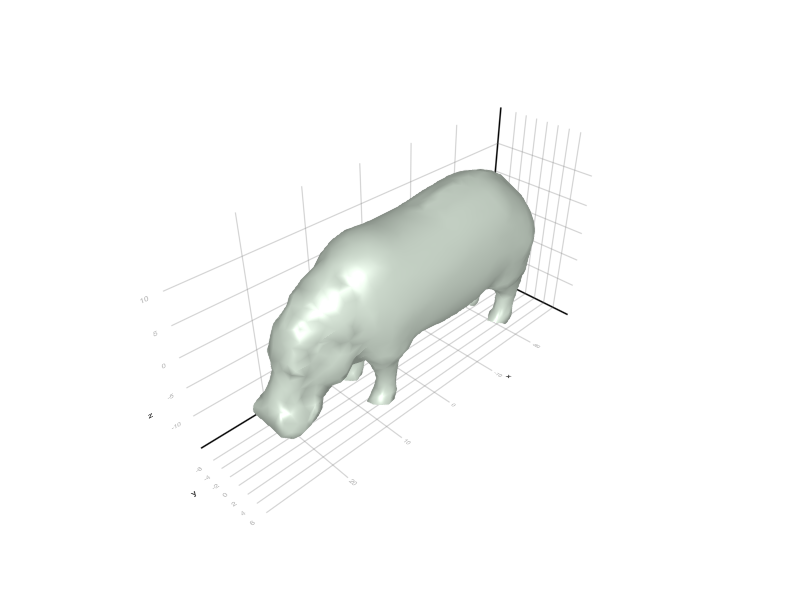

In [44]:
mesh(obj, color="honeydew2")

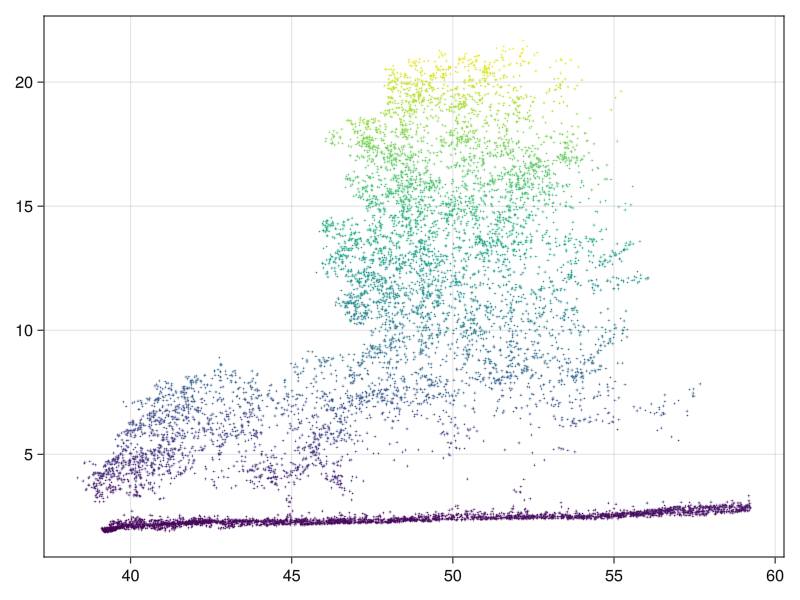

In [47]:
scatter(points_sampled[:,2:3], color=zcoloring_scale, markersize=2)